## Actual data can be larger than system memory (or simply cause the processing step slow)
in this situation, dimension reduction technique becomes suitable to reduce dimensional issue to  deal with this problem

Classification
------------------

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split

digits = load_digits()
list(digits.keys())
target_names = digits.target_names


In [4]:
target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
print("data shape: %r, target shape: %r" % (digits.data.shape, digits.target.shape))
print("classes: %r" % list(np.unique(digits.target)))
n_samples, n_features = digits.data.shape
print("n_samples=%d" % n_samples)
print("n_features=%d" % n_features)

data shape: (1797L, 64L), target shape: (1797L,)
classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
n_samples=1797
n_features=64


In [6]:
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Transformations
----------------

In [20]:
from sklearn.decomposition import PCA,RandomizedPCA,KernelPCA,TruncatedSVD,\
IncrementalPCA,MiniBatchSparsePCA,FastICA,SparsePCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import Isomap

In [9]:
n_components=2
pca= PCA(n_components)
X_pca = pca.fit_transform(digits.data)


In [10]:

rand_pca = RandomizedPCA(n_components)
X_rand_pca = rand_pca.fit_transform(digits.data)
X_rand_pca.shape

(1797L, 2L)

In [11]:
kpca= KernelPCA(n_components)
X_kpca = kpca.fit_transform(digits.data)


In [12]:
fica= FastICA(n_components)
X_fica = fica.fit_transform(digits.data)

In [13]:
tsvd= TruncatedSVD(n_components)
X_tsvd = tsvd.fit_transform(digits.data)

In [14]:
spca= SparsePCA(n_components)
X_spca = spca.fit_transform(digits.data)

### MiniBatchSparsePCA

In [15]:
mbs_pca= MiniBatchSparsePCA(n_components)
X_mbs_pca = mbs_pca.fit_transform(digits.data)

### Linear Discriminant Analysis

In [16]:
lda= LinearDiscriminantAnalysis(solver='svd',n_components=2)
X_lda = lda.fit(X,y).transform(X)
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'  % str(pca.explained_variance_ratio_))


explained variance ratio (first two components): [ 0.14890594  0.13618771]


C:\Users\trisi\AppData\Local\Dato\Dato Launcher\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [21]:
iso = Isomap(n_neighbors=5, n_components=2)
X_iso = iso.fit_transform(digits.data)

### Incremental PCA
This is alternative option when the dataset is too large to fit in memory. 

In [17]:
ipca= IncrementalPCA(n_components=2)
X_ipca = ipca.fit_transform(X)


Note: using subplot(211) where 2 denotes two rows of plot windows, one columne , third value denotes the positioning relative to other windows

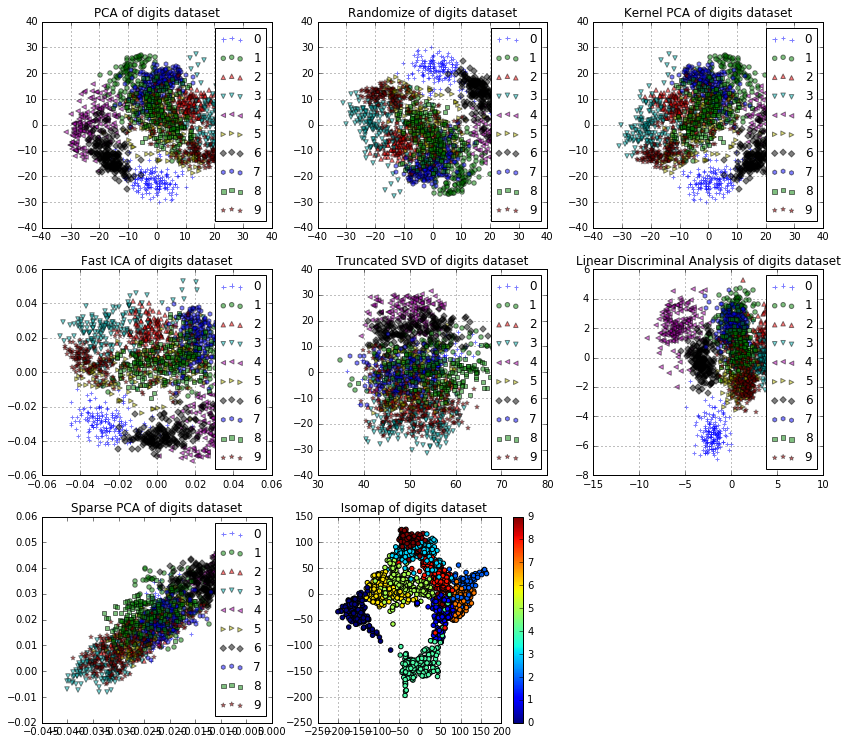

In [44]:
from itertools import cycle
plt.figure(figsize=(14,17),dpi=80,facecolor='w',edgecolor='k')

plt.subplot(431)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['+', 'o', '^', 'v', '<', '>', 'D', 'h', 's','*']
for i, c, m in zip(np.unique(digits.target), cycle(colors), markers):
    plt.scatter(X_pca[digits.target == i, 0], X_pca[digits.target == i, 1],
        c=c, marker=m, label=i, alpha=0.5)
plt.legend()
plt.title('PCA of digits dataset')
plt.grid(True)

plt.subplot(432)
for i, c, m in zip(np.unique(digits.target), cycle(colors), cycle(markers)):
    plt.scatter(X_rand_pca[digits.target == i, 0], X_rand_pca[digits.target == i, 1],
        c=c, marker=m, label=i, alpha=0.5)
plt.legend()
plt.title('Randomize of digits dataset')
plt.grid(True)

plt.subplot(433)
for i, c, m in zip(np.unique(digits.target), cycle(colors), cycle(markers)):
    plt.scatter(X_kpca[digits.target == i, 0], X_kpca[digits.target == i, 1],
        c=c, marker=m, label=i, alpha=0.5)
plt.legend()
plt.title('Kernel PCA of digits dataset')
plt.grid(True)

plt.subplot(434)
for i, c, m in zip(np.unique(digits.target), cycle(colors), cycle(markers)):
    plt.scatter(X_fica[digits.target == i, 0], X_fica[digits.target == i, 1],
        c=c, marker=m, label=i, alpha=0.5)
plt.legend()
plt.title('Fast ICA of digits dataset')
plt.grid(True)

plt.subplot(435)
for i, c, m in zip(np.unique(digits.target), cycle(colors), cycle(markers)):
    plt.scatter(X_tsvd[digits.target == i, 0], X_tsvd[digits.target == i, 1],
        c=c, marker=m, label=i, alpha=0.5)
plt.legend()
plt.title('Truncated SVD of digits dataset')
plt.grid(True)

plt.subplot(436)
for i, c, m in zip(np.unique(digits.target), cycle(colors), cycle(markers)):
    plt.scatter(X_lda[digits.target == i, 0], X_lda[digits.target == i, 1],
        c=c, marker=m, label=i, alpha=0.5)
plt.legend()
plt.title('Linear Discriminal Analysis of digits dataset')
plt.grid(True)

plt.subplot(437)
for i, c, m in zip(np.unique(digits.target), cycle(colors), cycle(markers)):
    plt.scatter(X_spca[digits.target == i, 0], X_spca[digits.target == i, 1],
        c=c, marker=m, label=i, alpha=0.5)
plt.legend()
plt.title('Sparse PCA of digits dataset')

plt.subplot(438)
plt.scatter(X_iso[:, 0],  X_iso[:, 1], c=digits.target)
plt.colorbar() 
plt.legend()
plt.title('  Isomap of digits dataset')
plt.grid(True)
plt.show()


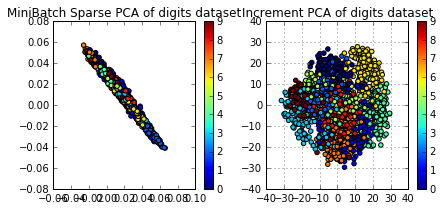

In [40]:
plt.figure(figsize=(7,3),dpi=60,facecolor='w',edgecolor='k')

plt.subplot(121)
plt.scatter(X_mbs_pca[:, 0],  X_mbs_pca[:, 1], c=digits.target)
plt.colorbar() 
plt.legend()
plt.title('MiniBatch Sparse PCA of digits dataset')

plt.subplot(122)
plt.scatter(X_ipca[:, 0],  X_ipca[:, 1], c=digits.target)
plt.colorbar()    
    
plt.legend()
plt.title('Increment PCA of digits dataset')
plt.grid(True)
plt.show()

Cross-validation scoring
--------------------------

In [80]:
import numpy as np
np.set_printoptions(precision=2)

In [81]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
scores = cross_val_score(SVC(), X_train, y_train, cv=5)
print(scores)

[ 0.41  0.44  0.43  0.48  0.53]


In [82]:
from sklearn.cross_validation import ShuffleSplit
cv_ss = ShuffleSplit(len(X_train))
scores_shuffle_split = cross_val_score(SVC(), X_train, y_train, cv=cv_ss)
print(scores_shuffle_split)

[ 0.43  0.45  0.27  0.39  0.39  0.39  0.38  0.39  0.41  0.42]


In [83]:
from sklearn.cross_validation import LeaveOneLabelOut
labels = np.arange(len(X_train)) % 3
cv_label = LeaveOneLabelOut(labels)
scores_pout = cross_val_score(SVC(), X_train, y_train, cv=cv_label)

Cross-validated grid-searches
------------------------------

In [84]:
import numpy as np
from sklearn.grid_search import GridSearchCV
param_grid = {'C': 10. ** np.arange(-3, 3), 'gamma': 10. ** np.arange(-3, 3)}
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

{'C': 10.0, 'gamma': 0.001}
0.988888888889


Pipelining
----------

In [85]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), SVC())
pipe.fit(X_train, y_train)
pipe.predict(X_test)

array([9, 2, 9, 2, 4, 6, 1, 5, 6, 6, 0, 0, 5, 7, 1, 5, 5, 1, 3, 9, 5, 6, 0,
       3, 4, 9, 8, 2, 9, 6, 9, 7, 6, 1, 8, 1, 3, 0, 5, 0, 9, 5, 7, 1, 3, 0,
       5, 3, 8, 4, 8, 4, 7, 2, 3, 8, 6, 1, 0, 6, 0, 2, 5, 0, 6, 5, 5, 5, 8,
       5, 3, 4, 9, 5, 9, 6, 7, 0, 7, 9, 3, 3, 5, 9, 2, 2, 6, 8, 5, 1, 4, 2,
       5, 0, 2, 5, 1, 4, 1, 6, 5, 8, 6, 2, 3, 5, 4, 8, 7, 3, 0, 6, 1, 1, 8,
       6, 9, 2, 7, 6, 4, 9, 9, 7, 8, 4, 5, 3, 1, 3, 6, 9, 5, 6, 0, 4, 7, 5,
       3, 1, 5, 9, 0, 5, 3, 1, 5, 4, 8, 4, 2, 1, 3, 5, 7, 8, 9, 3, 6, 9, 2,
       6, 0, 0, 2, 6, 5, 2, 8, 2, 7, 2, 5, 7, 4, 9, 2, 6, 5, 4, 2, 3, 4, 4,
       3, 9, 7, 3, 8, 4, 9, 6, 1, 8, 1, 5, 0, 9, 2, 6, 1, 1, 2, 1, 0, 4, 6,
       5, 1, 2, 9, 4, 9, 2, 0, 2, 9, 0, 3, 9, 8, 1, 9, 4, 1, 8, 4, 2, 2, 4,
       5, 2, 8, 6, 9, 4, 6, 2, 6, 2, 4, 9, 4, 1, 8, 0, 4, 0, 2, 1, 8, 2, 9,
       8, 1, 1, 7, 2, 0, 7, 4, 4, 8, 6, 3, 7, 6, 3, 9, 2, 9, 2, 6, 4, 5, 3,
       3, 2, 8, 1, 3, 9, 1, 3, 4, 1, 5, 8, 1, 2, 9, 7, 8, 4, 6, 9, 3, 1, 6,
       4, 0,

### Comparing dimension reduction techniques

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.decomposition import PCA, NMF, TruncatedSVD
from sklearn.manifold import Isomap
%matplotlib inline

In [3]:
pipe = Pipeline([
    ('reduce_dim',PCA()),
    ('classify',SVC())
]
)
param_grid = [
    { 'reduce_dim':[PCA(),NMF(),Isomap(),TruncatedSVD()],
     'reduce_dim__n_components':[2,3],
     'classify':[SVC(), LinearSVC()],
     'classify__C':[1,10,100,1000]
    }
    
]

In [4]:
grid = GridSearchCV(pipe,cv=3, n_jobs =-1,param_grid =param_grid)
iris = load_iris()
grid.fit(iris.data,iris.target)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('classify', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'reduce_dim': [PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=None, random_state=None, shuffle=False, solver='cd',
  tol=0.0..., penalty='l2', random_state=None, tol=0.0001,
     verbose=0)], 'classify__C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
    

In [5]:
grid.best_params_

{'classify': SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'classify__C': 10,
 'reduce_dim': PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False),
 'reduce_dim__n_components': 3}

In [6]:
grid.best_score_

0.97999999999999998

In [7]:
import pandas as pd
results_df = pd.DataFrame(grid.cv_results_)